In [1]:
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.constants import c
from astropy.coordinates import Galactic

import numpy as np
import healpy as hp
import pandas as pd
import matplotlib.pyplot as plt

import projections
from mycmap import get_continuous_cmap
import mycmap

#data from https://faun.rc.fas.harvard.edu/ameisner/wssa/healpix.html

In [2]:
hdu = fits.open('map_data/WISE_dustmap.fits')
cat = hdu[0].data

In [3]:
dust = get_continuous_cmap(['#010e3d', 
                            '#2c0e4e', 
                            '#530848', 
                            '#73023d', 
                            '#8f0030', 
                            '#ab0023', 
                            '#c60016', 
                            '#e30007', 
                            '#ff0000'])

In [4]:
npix = cat.shape[0]
hpx_index = np.arange(npix)
dust_map = np.zeros(npix)
dust_map[hpx_index] = cat

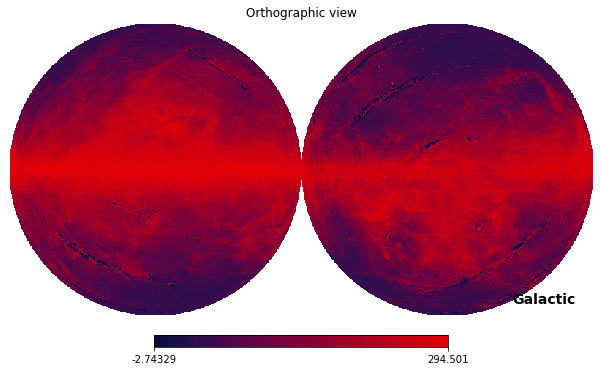

In [5]:
hp.orthview(dust_map,cmap=mycmap.dust,norm='hist',coord=["G"])

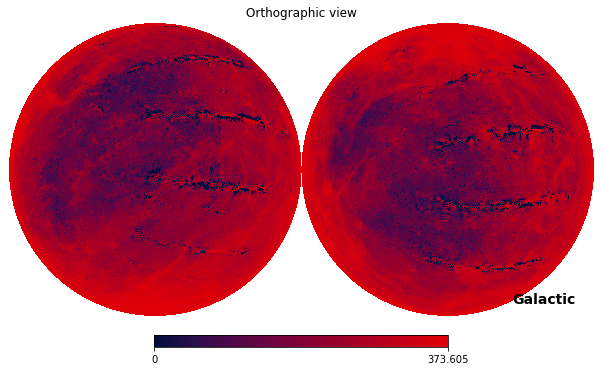

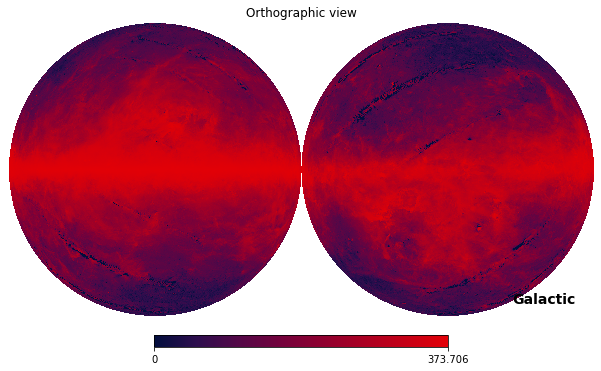

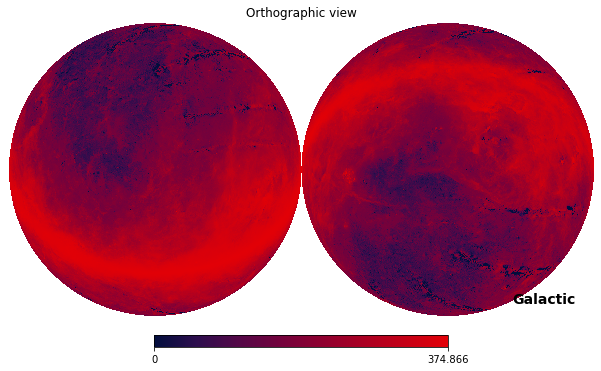

In [7]:
projections.generate_projection_set(dust_map,
                                    size=4096,
                                    dname='WISE_galactic_4096',
                                    cmap=mycmap.dust,
                                    norm='hist',
                                    coord=["G"])